Vamos a empezar a explorar las bases de datos 

In [53]:
pip install sqldf

Note: you may need to restart the kernel to use updated packages.


# Tarea 1
A continuación se cargarán las bibliotecas que serán, muy probablemente, utilizadas. 

In [82]:
#import sqlite3
import sqldf
import pandas as pd
from pylab import*
import numpy as np
import scipy.stats 
from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr
import pandas as pd

Ahora procedemos a cargar cada una de las bases del enunciado, iniciando los primeros pasos exploratorios. De manera general, se aplicará el mismo procedimiento a cada base y después, dependiendo de los datos que cada una presente, se observarán algunos tratamientos distintos. El procedimiento default corresponde a sacar, con info(), un resumen general de los tipos de datos que manejan las bases. Además, con sqldf se validará que no haya id's repetido si es el caso. 

In [68]:
ruta = "./data/"
bd = "base_ini_externa.txt"
bd_ini_externa = pd.read_csv(ruta+bd,sep=" ")
bd_ini_externa.head()

,_id_,comp_externo1,comp_externo2,comp_externo3,comp_externo4
0,78213,260.869565,25.854639,56.0,-230.0
1,76457,40.579710,2.872738,62.0,-230.0
2,40666,NaN,NaN,119.0,-230.0
3,8329,349.275362,34.616490,94.0,-230.0
4,68389,276.811594,27.434645,125.0,-230.0


In [66]:
bd_ini_externa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   comp_externo1  47831 non-null  float64
 2   comp_externo2  44410 non-null  float64
 3   comp_externo3  49994 non-null  float64
 4   comp_externo4  50000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.9 MB


In [24]:
query ="""
       select distinct(_id_) as id
       from bd_ini_externa       
       """
len(sqldf.run(query))

50000

In [63]:
bd="base_ini_interna.csv"
bd_ini_interna = pd.read_csv(ruta+bd)
bd_ini_interna.head()

,_id_,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3
0,78213,2020-03-25,0.000000,b'0',11.0,58.0,2.0,9.0,156.0
1,76457,2020-02-13,0.000000,b'1',28.0,45.0,1.0,4.0,173.0
2,40666,2018-01-24,0.000000,b'1',25.0,45.0,1.0,9.0,170.0
3,8329,2016-10-07,0.000000,b'1',14.0,59.0,3.0,3.0,159.0
4,68389,2019-07-30,2026.342452,b'1',1.0,67.0,2.0,9.0,146.0


In [26]:
bd_ini_interna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           50000 non-null  int64  
 1   fecha_inicio   50000 non-null  object 
 2   comp_interno1  50000 non-null  float64
 3   comp_interno2  50000 non-null  object 
 4   comp_interno3  50000 non-null  float64
 5   comp_interno4  50000 non-null  float64
 6   categoria1     50000 non-null  float64
 7   categoria2     50000 non-null  float64
 8   categoria3     50000 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [27]:
query ="""
       select distinct(_id_) as id
       from bd_ini_interna       
       """
len(sqldf.run(query))

50000

In [28]:
bd="base_ini_parte1.csv"
bd_ini_parte1 = pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [29]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [30]:
bd="base_comportamiento_2.txt"
bd_comportamiento_2 = pd.read_csv(ruta+bd,sep=" ",low_memory=False)
bd_comportamiento_2.tail()
#categoria2, o 1 comportamiento de los clientes. 

,num_caso,mes_informacion,Tiempo_aparicion
1455531,98990,2021-05-01 00:00:00,1.0
1455532,98992,2021-04-01 00:00:00,0.0
1455533,98992,2021-05-01 00:00:00,1.0
1455534,98997,2021-04-01 00:00:00,0.0
1455535,98997,2021-05-01 00:00:00,1.0


In [31]:
bd_comportamiento_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   Tiempo_aparicion  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [32]:
query ="""
       select distinct(num_caso) as id
       from bd_comportamiento_2       
       """
len(sqldf.run(query))

49352

Por ejemplo, esta base (bd_comportamiento_2) tiene un comportamiento peculiar. Parece ser que, en resumen, registra el tiempo desde que un caso (id) empieza un trámite. Sin embargo, existe una duda: ¿qué pasa si un caso inicia otro procedimiento en algún momento dado? ¿se vuelve a comenzar desde cero? La siguiente consulta está pensada para que nos dé esa información, además, en el proceso, se logra que sólo aparezcan los valores únicos de los números de casos:   

In [33]:
query ="""
       select num_caso,count(num_caso),max(Tiempo_aparicion) 
       from bd_comportamiento_2 group by num_caso       
       """
sqldf.run(query).head()

,num_caso,count(num_caso),max(Tiempo_aparicion)
0,1,62,61.0
1,7,29,28.0
2,8,63,51.0
3,9,15,14.0
4,10,16,15.0


La consulta indica que el máximo registro del tiempo no siempre es lo mismo que la cantidad de registros que tiene un caso dado (salvo por un número que se agrega por el cero) que es lo que se esperaría. Esto es un indicativo de que , en efecto, la base puede iniciar el registro de un mismo caso más adelante en el tiempo. La siguiente consulta dice cuántas veces un caso inició un proceso:  

In [34]:
query ="""
       select num_caso,count(Tiempo_aparicion) as cantidad_tramites 
       from bd_comportamiento_2 where Tiempo_aparicion=0 group by num_caso,Tiempo_aparicion        
       """
sqldf.run(query).head(20)

,num_caso,cantidad_tramites
0,1,1
1,7,1
2,8,5
3,9,1
4,10,1
5,14,1
6,18,1
7,21,1
8,22,1
9,24,1


In [35]:
bd="base_comportamiento_3.csv"
bd_comportamiento_3 = pd.read_csv(ruta+bd,low_memory=False)
bd_comportamiento_3.head()

,num_caso,mes_informacion,comportamiento_j
0,1,2016-04-01 00:00:00,0.0
1,1,2016-05-01 00:00:00,0.0
2,1,2016-06-01 00:00:00,0.0
3,1,2016-07-01 00:00:00,0.0
4,1,2016-08-01 00:00:00,0.0


In [36]:
bd_comportamiento_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455536 entries, 0 to 1455535
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   num_caso          1455536 non-null  int64  
 1   mes_informacion   1455536 non-null  object 
 2   comportamiento_j  1455536 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


In [37]:
query ="""
       select distinct(num_caso) as id
       from bd_comportamiento_3      
       """
len(sqldf.run(query))

49352

In [38]:
bd="base_inversion.txt"
bd_base_inversion= pd.read_csv(ruta+bd,sep=" ")
bd_base_inversion.head()

,_id2_,inversion
0,1758511,0.041039
1,1572947,77.422135
2,1051836,90.539953
3,1223255,90.205018
4,1894602,1.071354


In [39]:
bd_base_inversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17536 entries, 0 to 17535
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   _id2_      17536 non-null  int64  
 1   inversion  17536 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 274.1 KB


In [40]:
query ="""
       select distinct(_id2_)
       from bd_base_inversion      
       """
len(sqldf.run(query))

17536

In [44]:
bd="base_ini_parte1.csv"
bd_ini_parte1= pd.read_csv(ruta+bd)
bd_ini_parte1.head()

,_id_,_id2_,comp_mixto1
0,78213,1798899,0.33522
1,76457,1758511,0.33334
2,40666,935318,0.29186
3,8329,191567,0.29112
4,68389,1572947,0.27318


In [45]:
bd_ini_parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _id_         50000 non-null  int64  
 1   _id2_        50000 non-null  int64  
 2   comp_mixto1  50000 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


In [47]:
query ="""
       select distinct(_id_) as id
       from bd_ini_parte1      
       """
len(sqldf.run(query))

50000

In [48]:
query ="""
       select distinct(_id2_) as id
       from bd_ini_parte1      
       """
len(sqldf.run(query))

50000

In [ ]:
#EJERCICIO 2
#De la base data_schools obtener el error estándar con Bootstrap de las variables de la base. 
#Recordemos que tienen que simular N Muestras Boostrap con tamño n. Luego, el otro ejercicio es que lo hagan con n-1.
#Grafique los histogramas de las correlaciones
#Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [83]:
ruta = "./data/"
bd="data_schools.xlsx"
bd_escuelas=pd.read_excel(ruta+bd)
bd_escuelas.head(10)

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
5,6,576,3.39
6,7,620,3.10
7,8,615,3.40
8,9,553,2.97
9,10,607,2.91


In [5]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=bd_escuelas.sample(n=15,random_state=9998)#[["escuela"]]
escuelas_random["f_seleccion"]=1
print(escuelas_random)

    escuela  LSAT   GPA  f_seleccion
37       38   606  3.20            1
51       52   580  3.07            1
75       76   608  3.16            1
5         6   576  3.39            1
73       74   565  3.15            1
21       22   614  3.19            1
57       58   631  3.21            1
10       11   558  3.11            1
35       36   572  2.88            1
39       40   535  2.98            1
47       48   562  3.19            1
68       69   598  3.20            1
61       62   637  3.33            1
76       77   595  3.19            1
36       37   615  3.37            1


In [6]:
corr, _ = spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.648


In [106]:
corr1, _ = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.892


In [10]:
X = bd_escuelas[["LSAT"]]
x=X.to_numpy().reshape(-1)
x

array([622, 542, 579, 653, 606, 576, 620, 615, 553, 607, 558, 596, 635,
       581, 661, 547, 599, 646, 622, 611, 546, 614, 628, 575, 662, 627,
       608, 632, 587, 581, 605, 704, 477, 591, 578, 572, 615, 606, 603,
       535, 595, 575, 573, 644, 545, 645, 651, 562, 609, 555, 586, 580,
       594, 594, 560, 641, 512, 631, 597, 621, 617, 637, 572, 610, 562,
       635, 614, 546, 598, 666, 570, 570, 605, 565, 686, 608, 595, 590,
       558, 611, 564, 575], dtype=int64)

In [18]:
desEst=np.std(x)
(desEst)
np.mean(x)

597.5487804878048

In [122]:
def vec_corr(N,num,bd,col1,col2,remplazo):
    cor_boost=np.array([])
    for i in range(0,N):
        bd_random=bd.sample(n=num,replace=remplazo)
        corr,_=spearmanr(bd_random[col1],bd_random[col2])
        cor_boost = np.append(cor_boost,corr)
    return cor_boost    

In [115]:
cor_boost=vec_corr(1000,15,bd_escuelas,'LSAT','GPA',False)

In [116]:
#Este es el promedio de las correlaciones
np.mean(cor_boost)

0.7226268772027208

In [42]:
np.std(cor_boost)

0.13458607157969782

In [105]:
def hist_corr(cor_boost,corr1):
    fig, ax = plt.subplots(figsize=(9,6))
    hist(cor_boost,bins=50,alpha=0.5,edgecolor="white",label="Corr Boostrap")
    axvline(x=corr1,color='green', linestyle='--',linewidth=3,label="Correlacion sin boostrap")
    axvline(x=np.mean(cor_boost),color='black', linestyle='--',linewidth=3,label="correlación Boostrap$")

    axvline(percentile(cor_boost,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
    axvline(percentile(cor_boost,97.5),color="blue",linestyle="--",linewidth=2) 
    show()
    print("Correlacion sin Bootsrap:", corr1)
    print("Promedio de la Correlacion de las muestras Bootstrap:", np.mean(cor_boost))
    print("(", percentile(cor_boost,2.5),",",percentile(cor_boost,97.5),")")

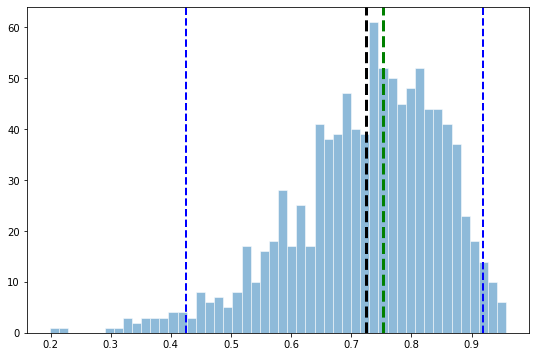

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7247823811578937
( 0.42534475835939856 , 0.9185592314754147 )


In [107]:
hist_corr(cor_boost,corr1)

In [ ]:
#El otro ejercicio que es con n-1

In [108]:
simul=1000
cor_boost2= np.array( [ ])
for i in range(0,simul):
    escuelas_random=bd_escuelas.sample(n=15)
    muestra_muestra=escuelas_random.sample(n=14)
    corr, _ = spearmanr(muestra_muestra.LSAT, muestra_muestra.GPA)
    cor_boost2 = np.append(cor_boost2,corr)

In [39]:
np.mean(cor_boost2)

0.7272572807815286

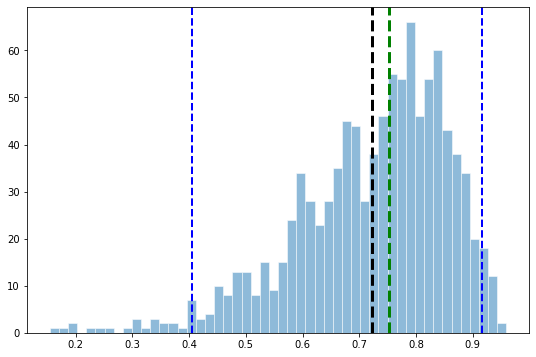

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.723012792551878
( 0.4048407290261131 , 0.9162996150409778 )


In [109]:
hist_corr(cor_boost2,corr1)

In [ ]:
#Ahora con una muestra de tamaño n igual al tamaño del numero de escuelas

In [118]:
simul=1000
cor_boost3=vec_corr(1000,len(bd_escuelas),bd_escuelas,'LSAT','GPA',True)

In [120]:
np.mean(cor_boost3)

0.7445588910833606

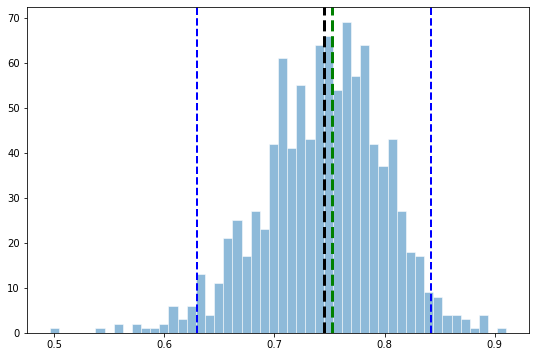

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7445588910833606
( 0.6294739256644797 , 0.842478033144805 )


In [121]:
#Obtengamos el Histograma de los correlaciones de las n muestras bootstrap
hist_corr(cor_boost3,corr1)

In [148]:
cor_boost4=np.array([])
for i in range(0,len(bd_escuelas)-1):
    escuelas_random=bd_escuelas.sample(len(bd_escuelas)-i)
    corr, _ = spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
    cor_boost4 = np.append(cor_boost4,corr)   

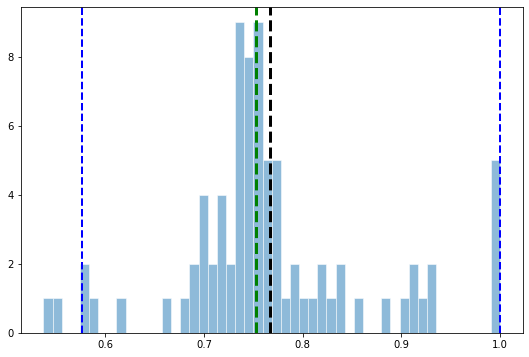

Correlacion sin Bootsrap: 0.7526621356232132
Promedio de la Correlacion de las muestras Bootstrap: 0.7668802573959425
( 0.5759937967493806 , 1.0 )


In [149]:
hist_corr(cor_boost4,corr1)

In [150]:
print(cor_boost4)

[0.75266214 0.75268715 0.74596792 0.74957689 0.74180531 0.74167079
 0.76794203 0.73528827 0.73402523 0.74123976 0.76259642 0.76131409
 0.75066735 0.77104374 0.75565021 0.77612524 0.70863883 0.77276208
 0.71525275 0.71665288 0.74729471 0.79137016 0.68852506 0.74672574
 0.72851627 0.77246937 0.76056146 0.73966869 0.72122959 0.75830426
 0.68921259 0.77468647 0.75441968 0.74125531 0.69675826 0.7672152
 0.70348661 0.78327789 0.71660262 0.73266355 0.73261707 0.82149397
 0.75502162 0.81117082 0.79318672 0.75689461 0.7091893  0.8167169
 0.73186029 0.68122127 0.79862449 0.75015167 0.5759938  0.58986703
 0.73189101 0.53706257 0.93312822 0.91254109 0.89908656 0.85799151
 0.69935013 0.65821976 0.82844244 0.72519754 0.9251421  0.7332926
 0.69757193 0.57781753 0.91208791 0.93260061 0.83916084 0.83636364
 0.55151515 0.88333333 0.73809524 1.         1.         0.61558701
 1.         1.         1.        ]


In [240]:
#determinar la mejor N: 
stds_corr=np.array([])
eNes=np.array([])
for i in range (1,101):
    std_aux=np.std(vec_corr(i,15,bd_escuelas,'LSAT','GPA',False))
    stds_corr=np.append(stds_corr,std_aux)
    eNes=np.append(eNes,i)

In [180]:
predataframe={'N':eNes, 'desvs_estandar':stds_corr}

In [182]:
dataframe=pd.DataFrame(predataframe)
dataframe.head()

,N,desvs_estandar
0,1.0,0.000000
1,2.0,0.015736
2,3.0,0.043345
3,4.0,0.129985
4,5.0,0.076788


In [187]:
query ="""
       select N as Nmin,min(desvs_estandar)
       from dataframe where N>50.0     
       """
sqldf.run(query)

,Nmin,min(desvs_estandar)
0,81.0,0.10445


In [211]:
#otra manera
miniN=pd.DataFrame(vec_corr(3000,15,bd_escuelas,'LSAT','GPA',False))


In [226]:
np.std(miniN.sample(n=4).transpose().to_numpy()[0])

0.08674269849594647

In [227]:
stds_corr=np.array([])
eNes=np.array([])
for i in range(1,len(miniN)-1):
    std_aux=np.std(miniN.sample(n=i).transpose().to_numpy()[0])
    stds_corr=np.append(stds_corr,std_aux)
    eNes=np.append(eNes,i)

In [228]:
predataframe={'N':eNes, 'desvs_estandar':stds_corr}

In [230]:
dataframe=pd.DataFrame(predataframe)
dataframe.tail()

,N,desvs_estandar
2993,2994.0,0.132549
2994,2995.0,0.132443
2995,2996.0,0.132584
2996,2997.0,0.132552
2997,2998.0,0.132570


In [239]:
query ="""
       select N as Nmin,min(desvs_estandar)
       from dataframe where N>100
       """
sqldf.run(query)

,Nmin,min(desvs_estandar)
0,138.0,0.109439
